<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors
from sklearn.model_selection import train_test_split

In [4]:
iris = datasets.load_iris(as_frame = True)
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
iris.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [6]:
df = pd.concat([iris.data, iris.target],
              axis = 1)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
df.target.unique()

array([0, 1, 2])

In [10]:
sum(df.target == 2)

50

In [11]:
df = df.loc[df.target.isin([0, 1])]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [12]:
df = df[["sepal length (cm)", "sepal width (cm)", "target"]]
df

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
95,5.7,3.0,1
96,5.7,2.9,1
97,6.2,2.9,1
98,5.1,2.5,1


In [13]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'target'], dtype='object')

In [14]:
X = df.loc[:, df.columns != "target"]
X

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
95,5.7,3.0
96,5.7,2.9
97,6.2,2.9
98,5.1,2.5


In [16]:
y = df.target
y

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: target, Length: 100, dtype: int32

In [17]:
class_0 = df[df["target"] == 0]
class_0

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
5,5.4,3.9,0
6,4.6,3.4,0
7,5.0,3.4,0
8,4.4,2.9,0
9,4.9,3.1,0


In [18]:
class_1 = df[df["target"] == 1]
class_1

,sepal length (cm),sepal width (cm),target
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1
55,5.7,2.8,1
56,6.3,3.3,1
57,4.9,2.4,1
58,6.6,2.9,1
59,5.2,2.7,1


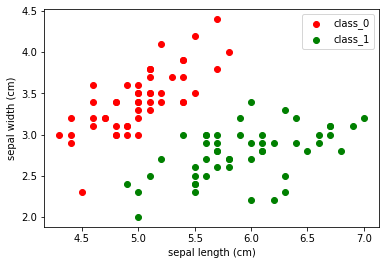

In [24]:
plt.scatter(class_0["sepal length (cm)"], class_0["sepal width (cm)"], color = "r", label = "class_0")
plt.scatter(class_1["sepal length (cm)"], class_1["sepal width (cm)"], color = "g", label = "class_1")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.legend()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [27]:
knn = neighbors.KNeighborsClassifier(n_neighbors= 5)

In [28]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
y_predict = knn.predict(X_test)

In [34]:
np.vstack([y_test, y_predict]).T

array([[1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1]])

In [35]:
knn.score(X_test, y_test)

1.0

In [36]:
score_list = []
for i in range(1, 15):
    knn_test = neighbors.KNeighborsClassifier(n_neighbors= i)
    knn_test.fit(X_train, y_train)
    score_list.append(knn_test.score(X_test, y_test))
score_list

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

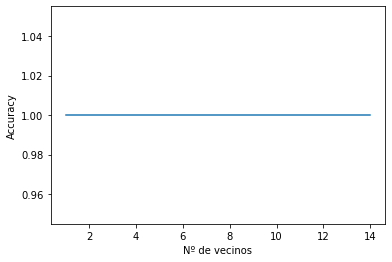

In [37]:
plt.plot(range(1, 15), score_list)
plt.xlabel("Nº de vecinos")
plt.ylabel("Accuracy")
plt.show()

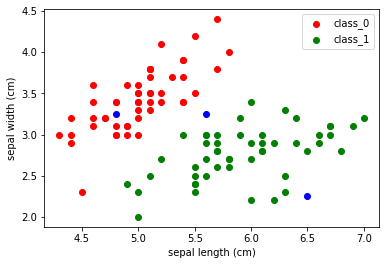

In [39]:
plt.scatter(class_0["sepal length (cm)"], class_0["sepal width (cm)"], color = "r", label = "class_0")
plt.scatter(class_1["sepal length (cm)"], class_1["sepal width (cm)"], color = "g", label = "class_1")
plt.scatter(4.8, 3.25, color = "b")
plt.scatter(6.5, 2.25, color = "b")
plt.scatter(5.6, 3.25, color = "b")

plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.legend()

In [41]:
X_test.values

array([[6. , 2.7],
       [5.5, 2.3],
       [5.9, 3.2],
       [4.8, 3. ],
       [5.1, 3.8],
       [5.1, 3.4],
       [4.6, 3.6],
       [5.5, 2.4],
       [5.4, 3.7],
       [5.1, 3.5],
       [5.7, 3.8],
       [4.8, 3.1],
       [6.1, 2.8],
       [5.5, 4.2],
       [5.5, 2.6],
       [5. , 3.6],
       [6.8, 2.8],
       [6.7, 3. ],
       [4.8, 3. ],
       [5.4, 3.4],
       [5.7, 2.8],
       [5.6, 3. ],
       [5. , 3.4],
       [4.4, 3.2],
       [5.6, 2.5],
       [5.7, 4.4],
       [5. , 3.5],
       [5.7, 2.9],
       [4.9, 3.1],
       [6.3, 2.5]])

In [42]:
new_points = [[4.8, 3.25],
             [6.5, 2.25],
             [5.6, 3.25]]

In [43]:
knn.predict(new_points)

array([0, 1, 1])